In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cs985-cs987-goodread-class-project/my_goodreads_test.csv
/kaggle/input/cs985-cs987-goodread-class-project/my_goodreads_train.csv
/kaggle/input/cs985-cs987-goodread-class-project/my_goodreads_sample_submission.csv


In [2]:
train_set = pd.read_csv('/kaggle/input/cs985-cs987-goodread-class-project/my_goodreads_train.csv')
test_set = pd.read_csv('/kaggle/input/cs985-cs987-goodread-class-project/my_goodreads_test.csv')

In [3]:
train_set = train_set[:200000]

In [4]:
from nltk.corpus import stopwords

stop = stopwords.words('english')

In [5]:
# remove stopwords from train and test set
train_set['review_text'] = train_set['review_text'].apply(lambda x : ' '.join([word for word in x.split() if word not in (stop)]))

test_set['review_text'] = test_set['review_text'].apply(lambda x : ' '.join([word for word in x.split() if word not in (stop)]))

In [6]:
from keras.preprocessing.text import Tokenizer
#fit tokenizer on training set
vocab_size = 5000
tokens = Tokenizer(num_words = vocab_size ,filters = '!"#$%&()*+,-./:;<=>?@[\]^_`{|}~' , lower = True)
tokens.fit_on_texts(train_set['review_text'].values)
word_indexes = tokens.word_index
print(len(word_indexes))

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

170832


In [7]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


# tokenize train set and categorize labels (Train set)
X = tokens.texts_to_sequences(train_set['review_text'].values)
X = pad_sequences(X , maxlen = 250)
y = to_categorical(train_set['rating'] , num_classes = 6)

X_eval, y_eval = X[-100001:], y[-100001:]
X, y = X[:-100000], y[:-100000]

# split to train and eval set (Train set)
X_train ,X_valid , y_train , y_valid = train_test_split(X , y ,test_size = 0.3 ,random_state = 42)

In [8]:
# tokenze test set ( Test set)
X_eval_final = tokens.texts_to_sequences(test_set['review_text'].values)
X_eval_final = pad_sequences(X_eval_final , maxlen = 250 )

# layers

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dropout, Flatten, SimpleRNN, LSTM, Input, GRU, InputLayer, GlobalMaxPooling1D

In [10]:

activation_functions = ['sigmoid' , 'relu' , 'tanh']
two_layer_histories = []

for funct in activation_functions:
    model_layer_1 = Sequential([
        Embedding(vocab_size + 1 ,4 ,input_length = 250),
        Flatten(),
        Dense(4 , activation = funct),
        Dense(4 , activation = funct),
        Dense(6, activation='softmax')        
    ])
    
    model_layer_1.compile(loss="categorical_crossentropy",
                  optimizer="Adam",
                  metrics=["accuracy"])
    
    history_layer_1 = model_layer_1.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
    
    results_layer_1 = model_layer_1.evaluate(X_eval, y_eval)
    
    two_layer_histories.append(results_layer_1)
    

Epoch 1/5
2188/2188 [==============================] - 10s 4ms/step - loss: 1.4577 - accuracy: 0.3590 - val_loss: 1.2764 - val_accuracy: 0.4581
Epoch 2/5
2188/2188 [==============================] - 7s 3ms/step - loss: 1.2246 - accuracy: 0.4635 - val_loss: 1.2155 - val_accuracy: 0.4646
Epoch 3/5
2188/2188 [==============================] - 7s 3ms/step - loss: 1.1797 - accuracy: 0.4791 - val_loss: 1.2051 - val_accuracy: 0.4639
Epoch 4/5
2188/2188 [==============================] - 8s 4ms/step - loss: 1.1593 - accuracy: 0.4880 - val_loss: 1.1992 - val_accuracy: 0.4692
Epoch 5/5
3126/3126 [==============================] - 5s 2ms/step - loss: 1.2032 - accuracy: 0.4638
Epoch 1/5
2188/2188 [==============================] - 8s 3ms/step - loss: 1.3381 - accuracy: 0.3873 - val_loss: 1.2113 - val_accuracy: 0.4436
Epoch 2/5
2188/2188 [==============================] - 7s 3ms/step - loss: 1.1717 - accuracy: 0.4698 - val_loss: 1.1624 - val_accuracy: 0.4829
Epoch 3/5
2188/2188 [===================

In [11]:
three_layer_histories = []

for funct in activation_functions:
    model_layer_2 = Sequential([
        Embedding(vocab_size + 1 ,4 ,input_length = 250),
        Flatten(),
        Dense(4 , activation = funct),
        Dense(4 , activation = funct),
        Dense(4 , activation = funct),
        Dense(6, activation='softmax')        
    ])
    
    model_layer_2.compile(loss="categorical_crossentropy",
                  optimizer="Adam",
                  metrics=["accuracy"])
    
    history_layer_2 = model_layer_2.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
    
    results_layer_2 = model_layer_2.evaluate(X_eval, y_eval)
    
    three_layer_histories.append(results_layer_2)



Epoch 1/5
2188/2188 [==============================] - 9s 4ms/step - loss: 1.4574 - accuracy: 0.3750 - val_loss: 1.3910 - val_accuracy: 0.4332
Epoch 2/5
2188/2188 [==============================] - 8s 4ms/step - loss: 1.3201 - accuracy: 0.4540 - val_loss: 1.2903 - val_accuracy: 0.4413
Epoch 3/5
2188/2188 [==============================] - 8s 3ms/step - loss: 1.2480 - accuracy: 0.4674 - val_loss: 1.2538 - val_accuracy: 0.4666
Epoch 4/5
2188/2188 [==============================] - 7s 3ms/step - loss: 1.2102 - accuracy: 0.4902 - val_loss: 1.2374 - val_accuracy: 0.4676
Epoch 5/5
3126/3126 [==============================] - 5s 2ms/step - loss: 1.2288 - accuracy: 0.4697
Epoch 1/5
2188/2188 [==============================] - 9s 4ms/step - loss: 1.4043 - accuracy: 0.3650 - val_loss: 1.2630 - val_accuracy: 0.3879
Epoch 2/5
2188/2188 [==============================] - 7s 3ms/step - loss: 1.1692 - accuracy: 0.4730 - val_loss: 1.1429 - val_accuracy: 0.4964
Epoch 3/5
2188/2188 [====================

In [12]:
four_layer_histories = []

for funct in activation_functions:
    model_layer_3 = Sequential([
        Embedding(vocab_size + 1 ,4 ,input_length = 250),
        Flatten(),
        Dense(4 , activation = funct),
        Dense(4 , activation = funct),
        Dense(4 , activation = funct),
        Dense(4 , activation = funct),
        Dense(6, activation='softmax')        
    ])
    
    model_layer_3.compile(loss="categorical_crossentropy",
                  optimizer="Adam",
                  metrics=["accuracy"])
    
    history_layer_3 = model_layer_3.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
    
    results_layer_3 = model_layer_3.evaluate(X_eval, y_eval)
    
    four_layer_histories.append(results_layer_3)



Epoch 1/5
2188/2188 [==============================] - 8s 3ms/step - loss: 1.4987 - accuracy: 0.3286 - val_loss: 1.4345 - val_accuracy: 0.3434
Epoch 2/5
2188/2188 [==============================] - 7s 3ms/step - loss: 1.3178 - accuracy: 0.4115 - val_loss: 1.2561 - val_accuracy: 0.4463
Epoch 3/5
2188/2188 [==============================] - 8s 4ms/step - loss: 1.2118 - accuracy: 0.4659 - val_loss: 1.2146 - val_accuracy: 0.4657
Epoch 4/5
2188/2188 [==============================] - 7s 3ms/step - loss: 1.1744 - accuracy: 0.4855 - val_loss: 1.2037 - val_accuracy: 0.4708
Epoch 5/5
3126/3126 [==============================] - 6s 2ms/step - loss: 1.1933 - accuracy: 0.4733
Epoch 1/5
2188/2188 [==============================] - 8s 3ms/step - loss: 1.3677 - accuracy: 0.3660 - val_loss: 1.2415 - val_accuracy: 0.4368
Epoch 2/5
2188/2188 [==============================] - 7s 3ms/step - loss: 1.2006 - accuracy: 0.4496 - val_loss: 1.1881 - val_accuracy: 0.4577
Epoch 3/5
2188/2188 [====================

In [13]:
tanh_results = [two_layer_histories[0][1], three_layer_histories[0][1], four_layer_histories[0][1]]
relu_results = [two_layer_histories[1][1], three_layer_histories[1][1], four_layer_histories[1][1]]
sigmoid_results = [two_layer_histories[2][1], three_layer_histories[2][1], four_layer_histories[2][1]]

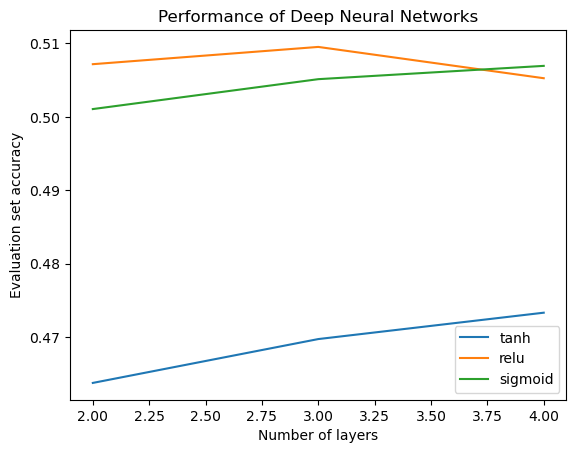

In [14]:
import matplotlib.pyplot as plt

layers = [2, 3, 4]
# plot
plt.figure()
plt.plot(layers, tanh_results, label='tanh')
plt.plot(layers, relu_results, label='relu')
plt.plot(layers, sigmoid_results, label='sigmoid')
plt.xlabel('Number of layers')
plt.ylabel('Evaluation set accuracy')
plt.legend()
plt.title('Performance of Deep Neural Networks')
plt.savefig('deep-nn.png')
plt.show()

In [15]:
# best performing
model_layer_final = Sequential([
        Embedding(vocab_size + 1 ,4 ,input_length = 250),
        Flatten(),
        Dense(4 , activation = 'tanh'),
        Dense(4 , activation = 'tanh'),
        Dense(4 , activation = 'tanh'),
        Dense(6, activation='softmax')        
    ])
    
model_layer_final.compile(loss="categorical_crossentropy",
                  optimizer="Adam",
                  metrics=["accuracy"])
    
history_layer_final = model_layer_final.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

Epoch 1/5
2188/2188 [==============================] - 9s 4ms/step - loss: 1.4291 - accuracy: 0.3729 - val_loss: 1.2348 - val_accuracy: 0.4673
Epoch 2/5
2188/2188 [==============================] - 8s 4ms/step - loss: 1.1466 - accuracy: 0.5069 - val_loss: 1.1322 - val_accuracy: 0.5069
Epoch 3/5
2188/2188 [==============================] - 9s 4ms/step - loss: 1.0551 - accuracy: 0.5502 - val_loss: 1.1186 - val_accuracy: 0.5141
Epoch 4/5
2188/2188 [==============================] - 9s 4ms/step - loss: 1.0128 - accuracy: 0.5732 - val_loss: 1.1319 - val_accuracy: 0.5079
Epoch 5/5
2188/2188 [==============================] - 7s 3ms/step - loss: 0.9829 - accuracy: 0.5906 - val_loss: 1.1611 - val_accuracy: 0.5024


In [16]:
predictions = model_layer_final.predict(X_eval_final)

6250/6250 [==============================] - 9s 1ms/step


In [17]:
final = np.argmax(predictions, axis=1)
submission_df = test_set[['review_id']]
submission_df['rating'] = final.astype(int)
submission_df.to_csv('submission.csv', index=False)

/tmp/ipykernel_20/2464041748.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_df['rating'] = final.astype(int)
